In [1]:
from synthetic_data import SyntheticCalciumDataGenerator, LorenzSystem, EmbeddedLowDNetwork
from infer_latent import plot_3d
import yaml
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

/home/luke/Documents/Projects/RichardsPostdoc/hierarchical_lfads/infer_latent.py:13: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


In [2]:
params = yaml.load(open('./synth_data/lorenz_params.yaml'), Loader=yaml.FullLoader)

In [3]:
lorenz = LorenzSystem(num_inits= params['inits'],
                      dt= params['dt_sys'])

net = EmbeddedLowDNetwork(low_d_system = lorenz,
                          net_size = params['cells'],
                          base_rate = params['rate_scale'],
                          dt = params['dt_sys'])

generator = SyntheticCalciumDataGenerator(system     = net,
                                          seed       = 12345,
                                          trainp     = params['trainp'],
                                          burn_steps = 1000,
                                          num_steps  = 100,
                                          num_trials = params['trials'],
                                          tau_cal    = 0.3,
                                          dt_cal     = 0.1,
                                          sigma      = 0.2)

In [4]:
data_dict = generator.generate_dataset()

In [5]:
Z = data_dict['train_latent']

In [6]:
Z.shape

(1040, 100, 3)

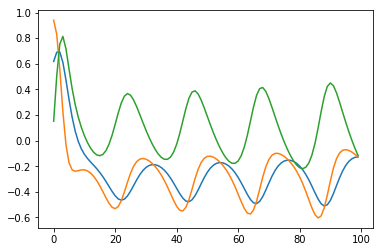

In [7]:
plt.plot(Z[2]);

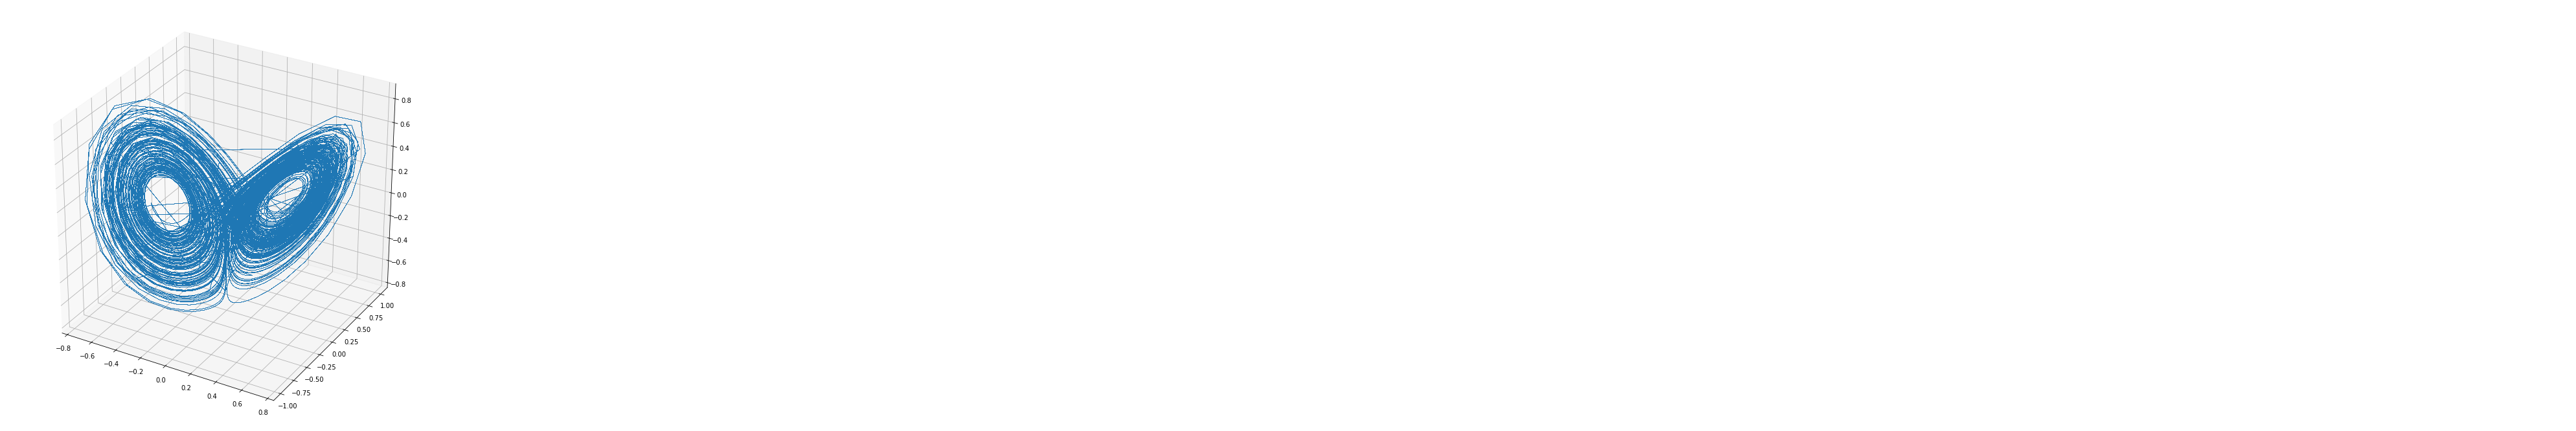

Signature: ax.view_init(elev=None, azim=None)
Source:   
    def view_init(self, elev=None, azim=None):
        """
        Set the elevation and azimuth of the axes.

        This can be used to rotate the axes programmatically.

        'elev' stores the elevation angle in the z plane.
        'azim' stores the azimuth angle in the x,y plane.

        if elev or azim are None (default), then the initial value
        is used which was specified in the :class:`Axes3D` constructor.
        """

        self.dist = 10

        if elev is None:
            self.elev = self.initial_elev
        else:
            self.elev = elev

        if azim is None:
            self.azim = self.initial_azim
        else:
            self.azim = azim
File:      ~/anaconda2/envs/pytorch11/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py
Type:      method


In [52]:
Zf = Z.reshape(np.prod(Z.shape[:-1]), Z.shape[-1]).T
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(Zf[0], Zf[1], Zf[2], lw=.1)
ax.view_init??

In [9]:
R = data_dict['train_rates']

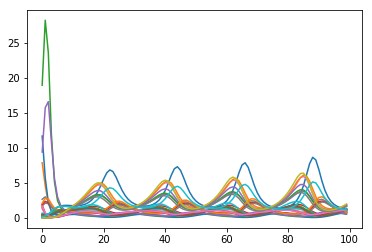

In [10]:
plt.plot(R[2]);

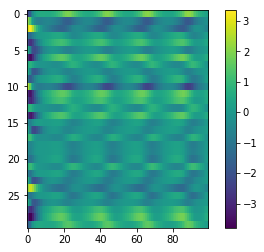

In [11]:
plt.imshow(np.log(R[2].T), aspect=4)
plt.colorbar()

In [12]:
S = data_dict['train_spikes']

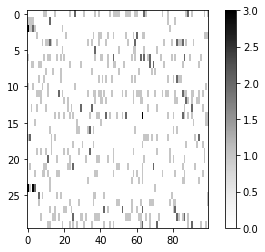

In [13]:
plt.imshow(S[2].T, cmap=plt.cm.Greys, aspect=4)
plt.colorbar()

In [14]:
S.sum()/(S.shape[0] * 10 * S.shape[2])

1.450551282051282

In [15]:
C = data_dict['train_calcium']

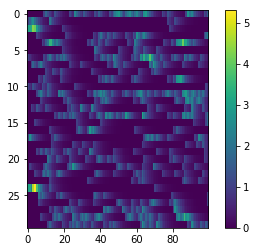

In [16]:
plt.imshow(C[2].T, aspect=4)
plt.colorbar()

In [17]:
F = data_dict['train_fluor']

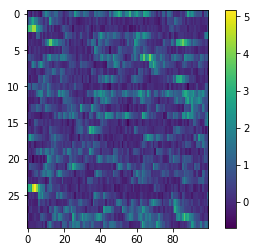

In [18]:
plt.imshow(F[2].T, aspect=4)
plt.colorbar()

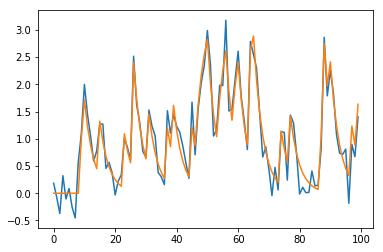

In [42]:
num_trials, num_steps, num_cells = F.shape
data = F.reshape(num_trials * num_steps, num_cells)
plt.plot(data[200:300,0])
plt.plot(C[2, :100, 0])

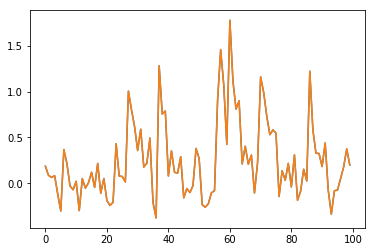

In [43]:
data = data.reshape(num_trials, num_steps, num_cells)
plt.plot(data[10, :, 20])
plt.plot(F[10, :, 20])

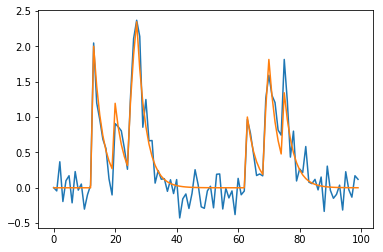

In [45]:
num_trials, num_steps, num_cells = F.shape
data = F.transpose(0, 2, 1)
data = data.reshape(num_trials * num_cells, num_steps)
plt.plot(data[5])
plt.plot(C[0, :, 5])

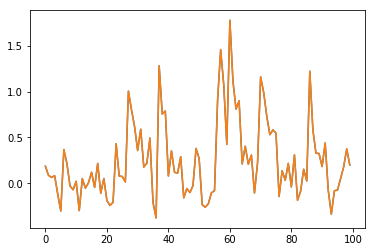

In [46]:
data = data.reshape(num_trials, num_cells, num_steps).transpose(0, 2, 1)
plt.plot(data[10, :, 20])
plt.plot(F[10, :, 20])

In [37]:
from synthetic_data import ChaoticNetwork, RandomPerturbation

params = yaml.load(open('./synth_data/chaotic-rnn_params.yaml'), Loader=yaml.FullLoader)

inputs = RandomPerturbation(t_span=[0.25, 0.75], scale=10)

net = ChaoticNetwork(num_inits= params['inits'],
                     max_rate= 5.0,
                     net_size = params['cells'],
                     weight_scale = 5.0,
                     dt=params['dt_sys'],
                     inputs = inputs)

generator = SyntheticCalciumDataGenerator(system     = net,
                                          seed       = 12345,
                                          trainp     = params['trainp'],
                                          burn_steps = 1000,
                                          num_steps  = 100,
                                          num_trials = params['trials'],
                                          tau_cal    = 0.3,
                                          dt_cal     = 0.1,
                                          sigma      = 0.2)

In [38]:
data_dict = generator.generate_dataset()

In [39]:
I = data_dict['train_inputs']

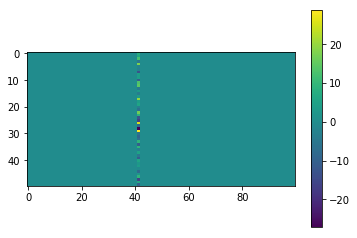

In [40]:
plt.imshow(I[1020].T)
plt.colorbar()

In [41]:
R = data_dict['train_rates']

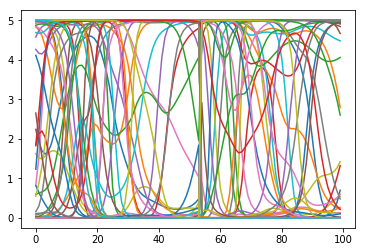

In [42]:
plt.plot(R[2]);

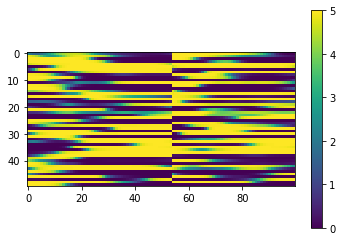

In [43]:
plt.imshow(R[2].T)
plt.colorbar()

In [44]:
S = data_dict['train_spikes']

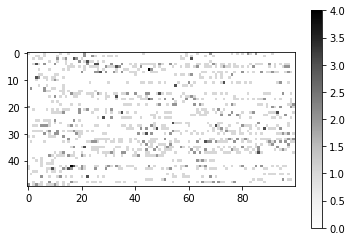

In [45]:
plt.imshow(S[2].T, cmap=plt.cm.Greys)
plt.colorbar()

In [46]:
C = data_dict['train_calcium']

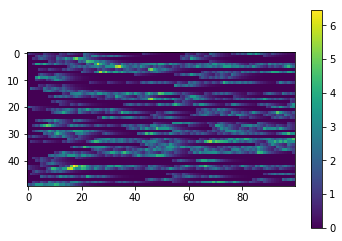

In [49]:
plt.imshow(C[2].T)
plt.colorbar()

In [50]:
F = data_dict['train_fluor']

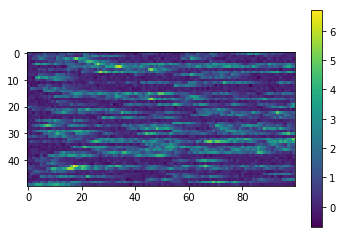

In [51]:
plt.imshow(F[2].T)
plt.colorbar()